In [1]:
!git clone https://github.com/Lasttrader/DA_repo

Cloning into 'DA_repo'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 63 (delta 1), reused 1 (delta 0), pack-reused 58
Receiving objects: 100% (63/63), 31.42 MiB | 15.14 MiB/s, done.
Resolving deltas: 100% (14/14), done.


#import

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor

import pickle

import cv2
import matplotlib.pyplot as plt

#Загрузка данных

In [3]:
path = '/content/DA_repo/bank.csv'

In [4]:
data = pd.read_csv(path, sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


#Работа с признаками

In [9]:
data['age'].value_counts()

34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64

In [10]:
y = np.array(data['age'])

In [11]:
pre_data = data.drop('age', axis = 1)
pre_data.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


##Категориальные признаки

In [12]:
#Список категориальных признаков
categorical_cols = pre_data.describe(include = 'object').columns.to_list()

In [13]:
categorical_data = pre_data[categorical_cols]
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [14]:
#labelEncoder
for  col in categorical_cols:
  le = LabelEncoder()
  categorical_data[col + 'LE'] = le.fit_transform(categorical_data[col])
  with open(f'{col}_le.pkl', 'wb') as f:
    pickle.dump(le, f)

categorical_data.head()

<ipython-input-14-93c54fd5efbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col + 'LE'] = le.fit_transform(categorical_data[col])
<ipython-input-14-93c54fd5efbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col + 'LE'] = le.fit_transform(categorical_data[col])
<ipython-input-14-93c54fd5efbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,job,marital,education,default,housing,loan,contact,month,poutcome,y,jobLE,maritalLE,educationLE,defaultLE,housingLE,loanLE,contactLE,monthLE,poutcomeLE,yLE
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no,10,1,0,0,0,0,0,10,3,0
1,services,married,secondary,no,yes,yes,cellular,may,failure,no,7,1,1,0,1,1,0,8,0,0
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no,4,2,2,0,1,0,0,0,0,0
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no,4,1,2,0,1,1,2,6,3,0
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,1,1,1,0,1,0,2,8,3,0


In [15]:
#удаляем ненужные нам категориальные признаки
categorical_data.drop(categorical_cols, axis = 1, inplace = True)
categorical_data.head()

,jobLE,maritalLE,educationLE,defaultLE,housingLE,loanLE,contactLE,monthLE,poutcomeLE,yLE
0,10,1,0,0,0,0,0,10,3,0
1,7,1,1,0,1,1,0,8,0,0
2,4,2,2,0,1,0,0,0,0,0
3,4,1,2,0,1,1,2,6,3,0
4,1,1,1,0,1,0,2,8,3,0


In [17]:
with open('month_le.pkl', 'rb') as f:
  month_le = pickle.load(f)

In [18]:
#Проверка обратного преобразования
categorical_data['month_invtrans'] = month_le.inverse_transform(categorical_data['monthLE'])
categorical_data.head()

,jobLE,maritalLE,educationLE,defaultLE,housingLE,loanLE,contactLE,monthLE,poutcomeLE,yLE,month_invtrans
0,10,1,0,0,0,0,0,10,3,0,oct
1,7,1,1,0,1,1,0,8,0,0,may
2,4,2,2,0,1,0,0,0,0,0,apr
3,4,1,2,0,1,1,2,6,3,0,jun
4,1,1,1,0,1,0,2,8,3,0,may


In [ ]:
categorical_data.drop('job_invtrans', axis=1, inplace = True)
categorical_data.head(1)

,jobLE,maritalLE,educationLE,defaultLE,housingLE,loanLE,contactLE,monthLE,poutcomeLE,yLE
0,10,1,0,0,0,0,0,10,3,0


##Числовые признаки

In [ ]:
#Список числовых признаков
num_cols = pre_data.describe().columns.to_list()
num_cols

['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
num_data = pre_data[num_cols]
num_data.head()

,balance,day,duration,campaign,pdays,previous
0,1787,19,79,1,-1,0
1,4789,11,220,1,339,4
2,1350,16,185,1,330,1
3,1476,3,199,4,-1,0
4,0,5,226,1,-1,0


In [ ]:
#standardScaler
scaler = StandardScaler()

num_data_scaled = scaler.fit_transform(num_data)
num_data_scaled[:3]

array([[ 0.12107186,  0.37405206, -0.7118608 , -0.57682947, -0.4072183 ,
        -0.32041282],
       [ 1.1186443 , -0.59602646, -0.16919389, -0.57682947,  2.98904408,
         2.04173372],
       [-0.02414438,  0.01027262, -0.30389844, -0.57682947,  2.89914302,
         0.27012381]])

In [ ]:
#сохраняем scaler
with open('num_scaler.pkl', 'wb') as f:
  pickle.dump(scaler, f)

In [ ]:
#проверяем
scaler.transform([[4789,	11,	220,	1,	339,	4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.1186443 , -0.59602646, -0.16919389, -0.57682947,  2.98904408,
         2.04173372]])

In [ ]:
#собираем dataframe
num_data_scaled_df= pd.DataFrame(data = num_data_scaled, columns = num_cols )
num_data_scaled_df.head()

,balance,day,duration,campaign,pdays,previous
0,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413
1,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734
2,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124
3,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413
4,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413


##Собираем итоговый dataframe

In [ ]:
#
final_dataset = pd.concat([data['age'], categorical_data, num_data_scaled_df], axis = 1)
final_dataset.head()

,age,jobLE,maritalLE,educationLE,defaultLE,housingLE,loanLE,contactLE,monthLE,poutcomeLE,yLE,balance,day,duration,campaign,pdays,previous
0,30,10,1,0,0,0,0,0,10,3,0,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413
1,33,7,1,1,0,1,1,0,8,0,0,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734
2,35,4,2,2,0,1,0,0,0,0,0,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124
3,30,4,1,2,0,1,1,2,6,3,0,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413
4,59,1,1,1,0,1,0,2,8,3,0,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413


#X-y, train_test_split

In [ ]:
y = np.array(final_dataset['age'])
X = np.array(final_dataset.drop('age', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3616, 16)
(905, 16)
(3616,)
(905,)


#ML

In [ ]:
kNNR = KNeighborsRegressor(n_neighbors=15)

kNNR.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
kNNR.predict(X_test[:4])

array([37.2       , 37.06666667, 40.26666667, 40.33333333])

In [ ]:
y_test[:4]

array([51, 50, 50, 37])

##Сохраняем модель

In [ ]:
#сохраняем kNNR
with open('kNNR.pkl', 'wb') as f:
  pickle.dump(kNNR, f)

#Yolo обучение на пользовательских классах

In [ ]:
https://github.com/ultralytics/ultralytics

In [ ]:
!pip install ultralytics

In [2]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.23M/6.23M [00:00<00:00, 64.6MB/s]
Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 476k/476k [00:00<00:00, 9.02MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 352.5ms
Speed: 22.1ms preprocess, 352.5ms inference, 32.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!wget https://wp-s.ru/wallpapers/3/7/331186437011087/football-of-the-famous-footballer-messi.jpg

In [4]:
!yolo predict model=yolov8n.pt source='/content/football-of-the-famous-footballer-messi.jpg'

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 /content/football-of-the-famous-footballer-messi.jpg: 384x640 8 persons, 198.8ms
Speed: 5.6ms preprocess, 198.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


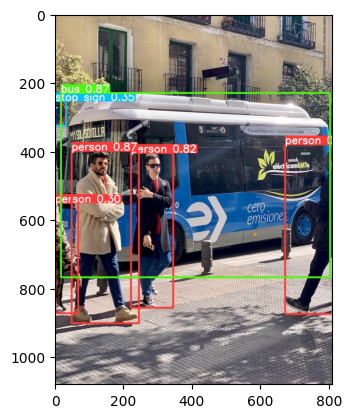

In [8]:
y_predict_1 = cv2.imread('/content/runs/detect/predict/bus.jpg')
y_predict_1 = cv2.cvtColor(y_predict_1, cv2.COLOR_BGR2RGB)
plt.imshow(y_predict_1)
plt.show()

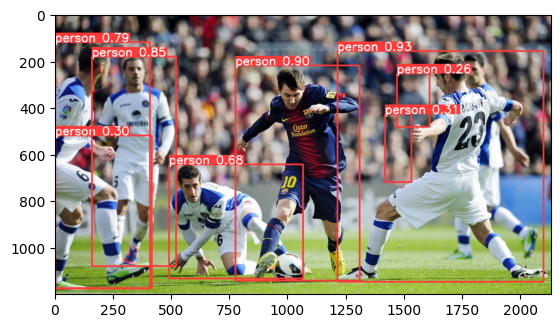

In [9]:
y_predict_2 = cv2.imread('/content/runs/detect/predict2/football-of-the-famous-footballer-messi.jpg')
y_predict_2 = cv2.cvtColor(y_predict_2, cv2.COLOR_BGR2RGB)
plt.imshow(y_predict_2)
plt.show()

##Обучение на свои классы

In [ ]:
!pip install roboflow

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="J77yEi2d2xHTvWscgWSN")
project = rf.workspace("grigorii-sokolov-ad5zb").project("cars1-ic3vc")
dataset = project.version(1).download("yolov7")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cars1-1 in yolov7pytorch:: 100%|██████████| 38/38 [00:00<00:00, 4006.32it/s]


In [3]:
!cat /content/cars1-1/test/labels/3_jpg.rf.05c0ba1b4681d4ab2ad41f29b4e7706b.txt

4 0.49296875 0.48984375 0.87734375 0.875

In [4]:
!cat /content/cars1-1/data.yaml

names:
- cars
- mouse
- plane
- traktor
- vacuum
nc: 5
roboflow:
  license: CC BY 4.0
  project: cars1-ic3vc
  url: https://universe.roboflow.com/grigorii-sokolov-ad5zb/cars1-ic3vc/dataset/1
  version: 1
  workspace: grigorii-sokolov-ad5zb
test: ../test/images
train: cars1-1/train/images
val: cars1-1/valid/images


In [6]:
!cat /content/cars1-1/data.yaml

names:
- cars
- mouse
- plane
- traktor
- vacuum
nc: 5
roboflow:
  license: CC BY 4.0
  project: cars1-ic3vc
  url: https://universe.roboflow.com/grigorii-sokolov-ad5zb/cars1-ic3vc/dataset/1
  version: 1
  workspace: grigorii-sokolov-ad5zb
test: ../test/images
train: ../train/images
val: ../valid/images


In [12]:
!yolo task=detect \
mode=train \
model=yolov8n.pt \
data=/content/cars1-1/data.yaml \
epochs=10 \
imgsz=640

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/cars1-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

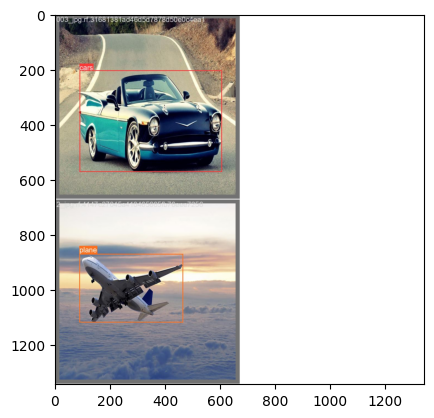

In [14]:
yolo_train = cv2.imread('/content/runs/detect/train4/val_batch0_labels.jpg')
yolo_train = cv2.cvtColor(yolo_train, cv2.COLOR_BGR2RGB)
plt.imshow(yolo_train)
plt.show()

In [15]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train4/weights/best.pt \
conf=0.01 \
source=/content/

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients

image 1/6 /content/1.jpg: 448x640 (no detections), 222.0ms
image 2/6 /content/2.jpg: 448x640 (no detections), 154.6ms
image 3/6 /content/3.jpg: 640x640 (no detections), 243.7ms
image 4/6 /content/4.jpeg: 480x640 (no detections), 167.9ms
image 5/6 /content/bus.jpg: 640x480 (no detections), 165.4ms
image 6/6 /content/football-of-the-famous-footballer-messi.jpg: 384x640 (no detections), 139.1ms
Speed: 4.6ms preprocess, 182.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


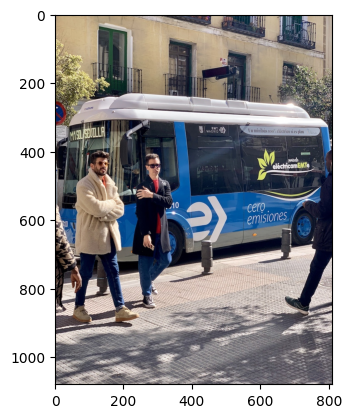

In [16]:
yolo_custom_predict = cv2.imread('/content/runs/detect/predict5/bus.jpg')
yolo_custom_predict = cv2.cvtColor(yolo_custom_predict, cv2.COLOR_BGR2RGB)
plt.imshow(yolo_custom_predict)
plt.show()

In [17]:
!yolo task=detect \
mode=predict \
model=/content/yolov8n.pt \
conf=0.01 \
source=/content/

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/6 /content/1.jpg: 448x640 1 person, 7 trucks, 400.3ms
image 2/6 /content/2.jpg: 448x640 1 airplane, 258.8ms
image 3/6 /content/3.jpg: 640x640 2 bicycles, 1 car, 1 motorcycle, 1 skateboard, 1 mouse, 1 cell phone, 1 vase, 2 scissorss, 4 toothbrushs, 399.6ms
image 4/6 /content/4.jpeg: 480x640 1 bird, 1 cat, 1 dog, 1 bear, 2 donuts, 1 couch, 274.8ms
image 5/6 /content/bus.jpg: 640x480 12 persons, 2 bicycles, 8 buss, 1 fire hydrant, 1 stop sign, 1 parking meter, 3 handbags, 2 ties, 1 skateboard, 1 potted plant, 181.5ms
image 6/6 /content/football-of-the-famous-footballer-messi.jpg: 384x640 242 persons, 9 sports balls, 2 baseball bats, 20 baseball gloves, 161.5ms
Speed: 6.6ms preprocess, 279.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultral

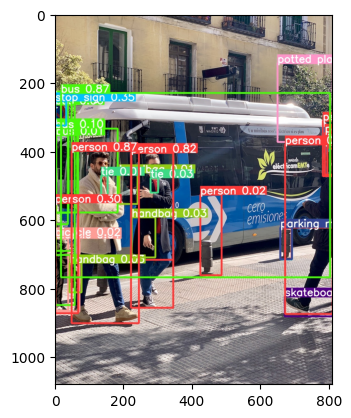

In [18]:
yolo_custom_predict6 = cv2.imread('/content/runs/detect/predict6/bus.jpg')
yolo_custom_predict6 = cv2.cvtColor(yolo_custom_predict6, cv2.COLOR_BGR2RGB)
plt.imshow(yolo_custom_predict6)
plt.show()

In [19]:
from ultralytics import YOLO
# Load a model
my_model = YOLO("/content/runs/detect/train4/weights/best.pt")  # load a pretrained model (recommended for training)
results = my_model("https://ultralytics.com/images/bus.jpg")  # predict on an image


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 (no detections), 229.8ms
Speed: 7.0ms preprocess, 229.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


In [22]:
# Load a model
yolo_model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
yolo_results = yolo_model("https://ultralytics.com/images/bus.jpg")  # predict on an image


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 220.3ms
Speed: 4.6ms preprocess, 220.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)
